### Explore the eDrone simulation model
### eDrones system will utilize 1-3 drones for emergency response only (out of total 4-10 drones for service)

In [1]:
import pandas as pd
import qgrid
df = pd.read_csv('D_drones_sobal-2021-07-20-16-32-57.csv')  

In [2]:
# sort the drone-types and delete duplicates - (probably a super inefficent way in the sim???)

In [3]:
qg = qgrid.show_grid(df, show_toolbar=True, precision=1)
qg

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [16]:
df_Ca = qg.get_changed_df()
#df_Ca = qg.get_selected_df()

In [17]:
df_Ca.describe(include='all') # need to create iso by range

,Unnamed: 0,arts_out,arte_out,fitnessFunc,totalOperatingCosts,drone-types
count,846.000000,846.000000,846.000000,846.000000,846.000000,8.460000e+02
mean,24364.522459,21.142461,20.519483,61.324475,202414.284342,4.135442e+08
std,13885.989568,10.743283,10.176871,16.179474,43026.085904,8.752656e+08
min,244.000000,10.460647,3.944909,30.117635,82654.248880,1.111100e+04
25%,12366.000000,14.998300,14.715446,49.770809,169861.880651,3.212222e+05
50%,24772.000000,18.313165,18.069278,58.275259,208190.137783,1.122178e+07
75%,35607.000000,23.473760,23.448144,67.833483,237435.053985,2.233128e+08
max,48779.000000,129.845134,173.194290,120.224823,267287.742378,3.333333e+09


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# plot the dataframe
plt.scatter(x=df_Ca["fitnessFunc"], y=df_Ca["arts_out"], label="Standard") #, figsize=(4, 4))
plt.scatter(x=df_Ca["fitnessFunc"], y=df_Ca["arte_out"], label="Emergency")
m1, b1 = np.polyfit(df_Ca["fitnessFunc"], df_Ca["arts_out"], 1)
m2, b2 = np.polyfit(df_Ca["fitnessFunc"], df_Ca["arte_out"], 1)
plt.plot(df_Ca["fitnessFunc"], m1*df_Ca["fitnessFunc"]+b1, color='orange')
plt.plot(df_Ca["fitnessFunc"], m2*df_Ca["fitnessFunc"]+b2, color='blue')
plt.title("Fitness vs. Response Times")
plt.xlabel("Fitness")
plt.ylabel("Resposne Time [min]")

Text(0, 0.5, 'Resposne Time [min]')

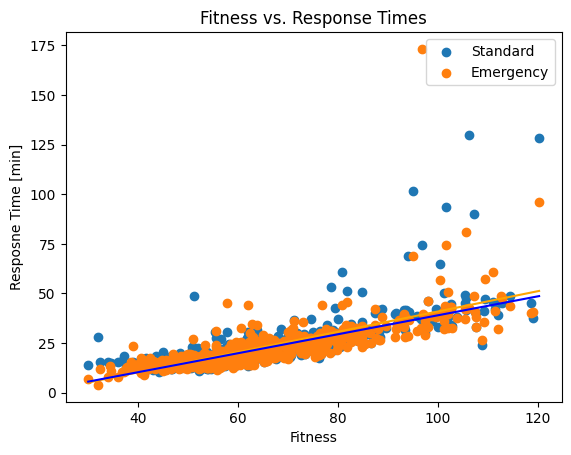

In [19]:
# print bar graph
plt.legend()
plt.show()

### Lets take a look at putting the param_values together with the results and see how the service range affects things

In [9]:
pv = pd.DataFrame(np.load('../param_values.npy'))

In [10]:
# concatinate dataframes to explore effects of service range
df_concat = pd.concat([pv,df], axis=1)
df_concat

,0,1,2,3,4,5,6,7,8,9,Unnamed: 0,arts_out,arte_out,fitnessFunc,totalOperatingCosts,drone-types
0,20.000000,0.000100,0.010000,1.000000e+04,2.000000,10.000000,0.000000,0.000000,0.000000,4.000000,0,5370.014583,4379.717630,5541.743920,2.839077e+04,2222
1,20.000000,0.000100,0.010000,1.000000e+04,2.000000,10.000000,0.000000,0.000000,0.000000,4.000000,1,5370.014583,4244.870573,5765.494796,4.500753e+04,3131
2,20.000000,0.000100,0.010000,1.000000e+04,2.000000,10.000000,0.000000,0.000000,0.000000,4.000000,2,5321.820514,4391.897806,839.665836,5.959303e+04,3323
3,20.000000,0.000100,0.010000,1.000000e+04,2.000000,10.000000,0.000000,0.000000,0.000000,4.000000,3,5370.014583,4267.965550,5842.765977,5.748703e+04,1333
4,20.000000,0.000100,0.010000,1.000000e+04,2.000000,10.000000,0.000000,0.000000,0.000000,4.000000,4,5370.014583,4168.443000,5684.795264,4.515679e+04,1133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22523,87.871094,0.000458,0.138584,1.333428e+06,8.521484,28.554688,0.139648,0.875977,0.584961,5.916016,22523,3424.955268,1340.149536,843.564570,1.425943e+06,222322
22524,87.871094,0.000458,0.138584,1.333428e+06,8.521484,28.554688,0.313477,0.618164,0.584961,5.916016,22524,4940.067542,3800.939186,10548.628889,1.447108e+06,132323
22525,87.871094,0.000458,0.138584,1.333428e+06,8.521484,28.554688,0.313477,0.875977,0.344727,5.916016,22525,4074.718982,2550.922006,5326.495731,1.441417e+06,233221
22526,87.871094,0.000458,0.138584,1.333428e+06,8.521484,28.554688,0.313477,0.875977,0.584961,9.103516,22526,4086.581999,1314.609252,306.116792,1.473230e+06,2233232332


In [11]:
# Now lets look at the effects of serrvice range on the response
qg_concat = qgrid.show_grid(df_concat, show_toolbar=True, precision=1)
qg_concat

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [13]:
# prune the df
qg_concat_pruned = qg_concat.get_changed_df()

In [14]:
# plot the dataframe
ax = plt.scatter(x=qg_concat_pruned[0], y=qg_concat_pruned["arts_out"], label="Standard") #, figsize=(4, 4))
ax = plt.scatter(x=qg_concat_pruned[0], y=qg_concat_pruned["arte_out"], label="Emergency")
ax.axes.set_xlabel('Service Range [km]')
ax.axes.set_ylabel('Response Time [minutes]')
#m1, b1 = np.polyfit(qg_concat_pruned[0], qg_concat_pruned["arts_out"], 1)
#m2, b2 = np.polyfit(qg_concat_pruned[0], qg_concat_pruned["arte_out"], 1)
#plt.plot(qg_concat_pruned["arts_out"], m1*qg_concat_pruned[0]+b1, color='orange')
#plt.plot(qg_concat_pruned[0], m2*qg_concat_pruned["fitnessFunc"]+b2, color='blue')
plt.title("Service Range vs. Response Times")

Text(0, 0.5, 'Response Time [minutes]')

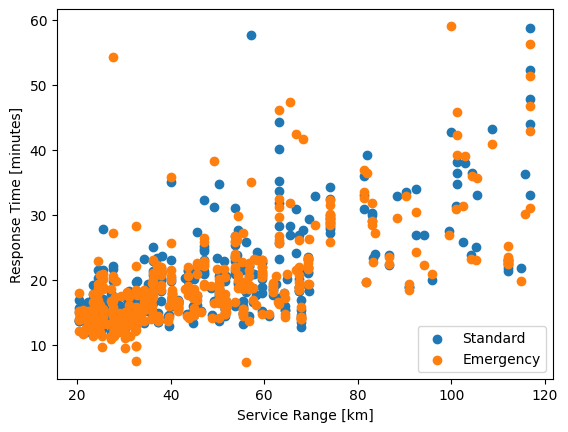

In [15]:
# print bar graph
plt.legend()
plt.show()

In [16]:
# now lets create a surface plot by service range and number of couriers
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating dataset
x = qg_concat_pruned[0] # service range
y = qg_concat_pruned["arts_out"] #standard response time
z = qg_concat_pruned[9] # number of drones
type(z)

pandas.core.series.Series

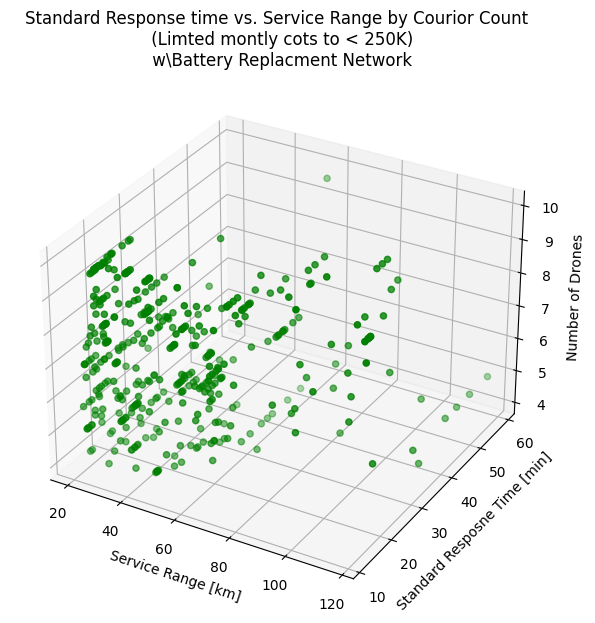

In [17]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
ax.set_xlabel('Service Range [km]')
ax.set_ylabel('Standard Resposne Time [min]')
ax.set_zlabel('Number of Drones')

#
ax.set_title('Standard Response time vs. Service Range by Courior Count \n (Limted montly cots to < 250K)\n w\Battery Replacment Network')
ax.set

# show plot
plt.show()

In [18]:
qg_concat_pruned.describe(include='all') # need to create iso by range

,0,1,2,3,4,5,6,7,8,9,Unnamed: 0,arts_out,arte_out,fitnessFunc,totalOperatingCosts,drone-types
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,4.230000e+02
mean,48.526707,0.004390,0.585086,77029.818632,9.645529,27.900968,0.478095,0.488581,0.533272,7.215619,11500.959811,19.694908,19.559589,61.175795,209539.105689,4.426332e+08
std,23.011476,0.002647,0.260829,48373.879449,4.776487,11.500978,0.279911,0.279461,0.278491,1.719860,6702.810499,7.125078,7.559809,15.699268,47260.084964,8.976914e+08
min,20.488281,0.000390,0.066074,11943.359375,2.333984,10.312500,0.010742,0.000977,0.010742,4.070312,444.000000,11.579127,7.387292,27.843098,98666.715962,1.132300e+04
25%,30.400391,0.002169,0.322275,37207.031250,6.007812,17.578125,0.232422,0.243164,0.306641,5.769531,5915.500000,14.876707,14.682047,50.666281,168116.041199,3.331270e+05
50%,41.582031,0.003842,0.600713,66357.421875,8.451172,28.125000,0.440430,0.461914,0.544922,7.328125,10716.000000,17.360050,17.657179,57.361819,217741.841638,1.212222e+07
75%,59.453125,0.006587,0.810508,111054.687500,12.511719,35.820312,0.708984,0.742188,0.755371,8.684570,17796.500000,21.844807,21.978627,66.610007,252006.048983,2.322123e+08
max,116.875000,0.009923,0.991299,217939.453125,19.806641,49.843750,0.995117,0.999023,0.993164,9.994141,22439.000000,58.728261,59.098537,117.490750,276167.327208,3.333333e+09


In [19]:
# now lets create a surface plot by service range and number of couriers
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating dataset
x = qg_concat_pruned[0] # service range
y = qg_concat_pruned["arte_out"] #standard response time
z = qg_concat_pruned[9] # number of drones
type(z)

pandas.core.series.Series

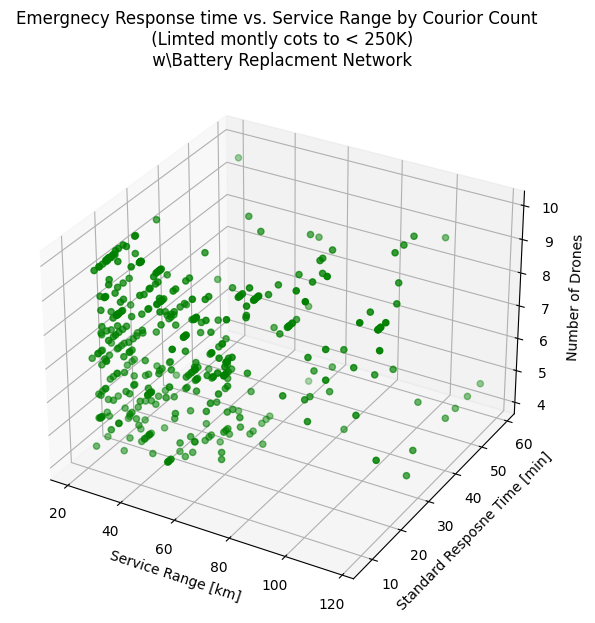

In [20]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
ax.set_xlabel('Service Range [km]')
ax.set_ylabel('Standard Resposne Time [min]')
ax.set_zlabel('Number of Drones')

#
ax.set_title('Emergnecy Response time vs. Service Range by Courior Count \n (Limted montly cots to < 250K)\n w\Battery Replacment Network')
ax.set

# show plot
plt.show()